In [1]:
import pandas as pd ; import networkx as nx ; import ast ; import matplotlib.pyplot as plt ; import numpy as np ;
import nltk ; from wordcloud import WordCloud, ImageColorGenerator ; from PIL import Image ; import urllib.request ;
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS ; from collections import Counter


In [2]:
# df_characters = pd.read_csv("RaM_characters_wRelationsAndAttributes.csv")
# df_characters = df_characters.drop('Unnamed: 0', axis=1)
# df_episodes = pd.read_csv("RaM_episodes.csv")

In [3]:
# df_transcripts = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/transcripts/RickAndMortyScripts.csv")
# df_transcripts = df_transcripts.drop('index', axis = 1)
# df_transcripts

In [4]:
df_characters = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/df_characters_with_attr_and_communities.csv")
df_characters = df_characters.drop('Unnamed: 0', axis=1)
df_episodes = pd.read_csv('https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/RaM_episodes.csv')
df_transcripts = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/transcripts/RickAndMortyScripts.csv")
nrc = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/NRC.csv")

In [5]:
df_characters['degree'] = df_characters['in_degree'] + df_characters['out_degree']

In [6]:
# df_characters[df_characters['Name'].str.contains('Rick')].sort_values(by='degree', ascending = False)[:30]

In [7]:
#pd.set_option('display.max_rows', 550)

In [8]:
# df_characters[df_characters.Name.isin(['Rick Sanchez', 'Evil Rick Sanchez', 'Rick Sanchez (C-132)', 'Memory Rick', 'Rick Sanchez (Replacement Dimension)', 'Doofus Rick', 'Tiny Rick', 'Cronenberg Rick', 'Pickle_Rick_(character)', 'Toxic Rick'])]


In [9]:
# df_transcripts[df_transcripts.name.isin(['Rick Sanchez', 'Evil Rick Sanchez', 'Rick Sanchez (C-132)', 'Memory Rick', 'Rick Sanchez (Replacement Dimension)', 'Doofus Rick', 'Tiny Rick', 'Cronenberg Rick', 'Pickle_Rick_(character)', 'Toxic Rick'])]

In [10]:
df_transcripts["name"].replace({"Rick": "Rick Sanchez"}, inplace=True)
df_transcripts["name"].replace({"Evil Rick": "Evil Rick Sanchez"}, inplace=True)
df_transcripts["name"].replace({"Pickle Rick": "Pickle Rick (character)"}, inplace=True)
df_transcripts["name"].replace({"Morty": "Morty Smith"}, inplace=True)
df_transcripts["name"].replace({"Beth": "Beth Smith"}, inplace=True)
df_transcripts["name"].replace({"Jerry": "Jerry Smith"}, inplace=True)
df_transcripts["name"].replace({"Summer": "Summer Smith"}, inplace=True)

df_charLines = df_transcripts.groupby(['name'], as_index = False).agg({'line': ','.join})



In [11]:
characters_dialogue = df_charLines.set_index('name').T.to_dict('list') 


In [12]:
# df_charLines[df_charLines.name.isin(['Rick Sanchez', 'Evil Rick Sanchez', 'Memory Rick', 'Rick Sanchez (Replacement Dimension)', 'Doofus Rick', 'Tiny Rick', 'Cronenberg Rick', 'Pickle Rick (character)', 'Toxic Rick'])]

In [13]:
#Find the episodes where each one of Ricks appears:
# RicksAppear = {'Evil Rick Sanchez': ["Close Rick-counters of the Rick Kind", "Tales from the Citadel", "Rickmurai Jack"], 'Rick Sanchez (Replacement Dimension)': ["Rick Potion #9"], 'Doofus Rick': ["Close Rick-Counters of the Rick Kind", "The Rickshank Rickdemption"], 'Pickle Rick (character)':["Pickle Rick", "Edge of Tomorty: Rick Die Rickpeat"], 'Cronenberg Rick': ["Rick Potion #9", "Close Rick-counters of the Rick Kind"], 'Toxic Rick': ["Rest and Ricklaxation"]}    

In [14]:
# df_transcripts[df_transcripts['episode name'].isin(["Pickle Rick", "Edge of Tomorty: Rick Die Rickpeat"])].name.unique()

In [15]:
# pd.set_option('display.max_rows', 2000)

# df_transcripts[df_transcripts['episode no.'] == 7]

In [16]:
# Save as a csv
#df_charLines.to_csv('df_char_lines.csv', index=False)

In [17]:
# df_charLines[df_charLines.name.isin(['Doofus Rick', 'Evil Rick Sanchez', 'Pickle Rick', 'Rick Sanchez', 'Toxic Rick'])]

In [18]:
# #Remove stopwords
# df_Ricks_Lines.line = df_Ricks_Lines.line.apply(lambda x: remove_stopwords(x))

# df_Ricks_Lines

In [19]:
# Ricks_dialogue = {k: v for k, v in characters_dialogue.items() if k in ['Doofus Rick', 'Evil Rick Sanchez', 'Pickle Rick', 'Rick Sanchez', 'Toxic Rick']}

In [20]:
# df_transcripts['line_index'] = df_transcripts.index
# df_transcripts

In [21]:
###VADER METHOD FOR SENTIMENT ANALYSIS

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# calculate the VADER sentiment score for each character

analyzer = SentimentIntensityAnalyzer()



def calculate_VADER_of_a_node(aRow, aDialogueDict):
    if (aRow['season no.'], aRow['episode no.'], aRow['episode name']) in list(aDialogueDict.keys()):
        vader_score_list.append(np.mean([analyzer.polarity_scores(aSentence)['compound'] for aSentence in aDialogueDict[(aRow['season no.'], aRow['episode no.'], aRow['episode name'])]]))
    else:
        vader_score_list.append(None)  
        


In [22]:
df_episode_lines = df_transcripts.groupby(['season no.', 'episode no.', 'episode name', 'name'], as_index = False).agg({'line': ','.join})

## RICK'S EVOLVEMENT

df_Ricks_lines = df_episode_lines[df_episode_lines.name == 'Rick Sanchez']# .drop('name', axis=1)
df_Ricks_lines.line = df_Ricks_lines.line.apply(lambda x: remove_stopwords(x))

Ricks_dialogue = df_Ricks_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

vader_score_list = []
_ = df_Ricks_lines.apply(lambda x: calculate_VADER_of_a_node(x, Ricks_dialogue), axis = 1)

# store in dataframe as a new column
df_Ricks_lines['VADER_score']=vader_score_list
df_VADER_Rick = df_Ricks_lines[df_Ricks_lines.VADER_score.notnull()]
df_VADER_Rick





## MORTY'S EVOLVEMENT

df_Mortys_lines = df_episode_lines[df_episode_lines.name == 'Morty Smith']# .drop('name', axis=1)
df_Mortys_lines.line = df_Mortys_lines.line.apply(lambda x: remove_stopwords(x))

Mortys_dialogue = df_Mortys_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

vader_score_list = []
_ = df_Mortys_lines.apply(lambda x: calculate_VADER_of_a_node(x, Mortys_dialogue), axis = 1)

# store in dataframe as a new column
df_Mortys_lines['VADER_score']=vader_score_list
df_VADER_Morty = df_Mortys_lines[df_Mortys_lines.VADER_score.notnull()]



## BETH'S EVOLVEMENT

df_Beths_lines = df_episode_lines[df_episode_lines.name == 'Beth Smith']# .drop('name', axis=1)
df_Beths_lines.line = df_Beths_lines.line.apply(lambda x: remove_stopwords(x))

Beths_dialogue = df_Beths_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

vader_score_list = []
_ = df_Beths_lines.apply(lambda x: calculate_VADER_of_a_node(x, Beths_dialogue), axis = 1)

# store in dataframe as a new column
df_Beths_lines['VADER_score']=vader_score_list
df_VADER_Beth = df_Beths_lines[df_Beths_lines.VADER_score.notnull()]


## JERRY'S EVOLVEMENT

df_Jerrys_lines = df_episode_lines[df_episode_lines.name == 'Jerry Smith']# .drop('name', axis=1)
df_Jerrys_lines.line = df_Jerrys_lines.line.apply(lambda x: remove_stopwords(x))

Jerrys_dialogue = df_Jerrys_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

vader_score_list = []
_ = df_Jerrys_lines.apply(lambda x: calculate_VADER_of_a_node(x, Jerrys_dialogue), axis = 1)

# store in dataframe as a new column
df_Jerrys_lines['VADER_score']=vader_score_list
df_VADER_Jerry = df_Jerrys_lines[df_Jerrys_lines.VADER_score.notnull()]


## SUMMER'S EVOLVEMENT

df_Summers_lines = df_episode_lines[df_episode_lines.name == 'Summer Smith']# .drop('name', axis=1)
df_Summers_lines.line = df_Summers_lines.line.apply(lambda x: remove_stopwords(x))

Summers_dialogue = df_Summers_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

vader_score_list = []
_ = df_Summers_lines.apply(lambda x: calculate_VADER_of_a_node(x, Summers_dialogue), axis = 1)

# store in dataframe as a new column
df_Summers_lines['VADER_score']=vader_score_list
df_VADER_Summer = df_Summers_lines[df_Summers_lines.VADER_score.notnull()]

C:\Users\alex_\Anaconda3\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\alex_\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\alex_\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [23]:
df_VADER_Rick

,season no.,episode no.,episode name,name,line,VADER_score
7,1,1,Pilot,Rick Sanchez,Morty! You gotta come on. Jus'... gotta come m...,0.49805
14,1,2,Lawnmower Dog,Rick Sanchez,"Morty, come on. I need help tonight.,I thought...",0.49515
37,1,3,Anatomy Park,Rick Sanchez,"Ho ho ho, everybody.,Calm Jerry, Ruben, old fr...",0.46310
57,1,4,M. Night Shaym-Aliens!,Rick Sanchez,"T-t-t-this sloppy craftsmanship.,Oh, yes, Mort...",0.49740
91,1,5,Meeseeks and Destroy,Rick Sanchez,"Run!,Morty, it! Hit button now!,*holding clone...",0.49525
109,1,6,Rick Potion 9,Rick Sanchez,"I pregnant, she'll marry me.,Sorry, proceed st...",0.47280
147,1,8,Rixty Minutes,Rick Sanchez,"Well it's consolation, Summer, mattered, entir...",0.47475
173,1,9,Something Ricked This Way Comes,Rick Sanchez,"Whatever.,Well, scientifically, traditions idi...",-0.45965
215,1,10,Close Rick-counters of the Rick Kind,Rick Sanchez,"Martin Luther King Jr.'s birthday.,It is.,Oh, ...",-0.46525
242,1,11,Ricksy Business,Rick Sanchez,"Have fun, two.,I know, c-can wrap up? Morty I ...",0.49230


In [24]:
df_VADER_Morty

,season no.,episode no.,episode name,name,line,VADER_score
4,1,1,Pilot,Morty Smith,"What, Rick? What’s going on?,It's middle night...",0.49435
11,1,2,Lawnmower Dog,Morty Smith,"What's wrong?,Oh, didn't mean it, dad. Did you...",0.48375
34,1,3,Anatomy Park,Morty Smith,"You know, I thought born half-God something., ...",-0.48860
50,1,4,M. Night Shaym-Aliens!,Morty Smith,"Hey, Rick. Boy, sure especially beautiful toda...",0.36385
84,1,5,Meeseeks and Destroy,Morty Smith,"I can’t it, Rick! They’re parents sister!,Ohhh...",0.49910
107,1,6,Rick Potion 9,Morty Smith,"Ohhh. Okay, go. H-Heyy Jessica, ughh.,Ugghh,Um...",0.48955
140,1,8,Rixty Minutes,Morty Smith,"Oh, cool! Is crystallized Zanthonite? It condu...",0.49720
168,1,9,Something Ricked This Way Comes,Morty Smith,"Hey Rick, I project science fair weekend. You ...",0.49620
200,1,10,Close Rick-counters of the Rick Kind,Morty Smith,"Rick!,Oh, man.,Geez, Rick! Wh-what place?,Coun...",0.49515
238,1,11,Ricksy Business,Morty Smith,"Drive carefully!,Aw, geez, Rick! If mom's who'...",0.48755


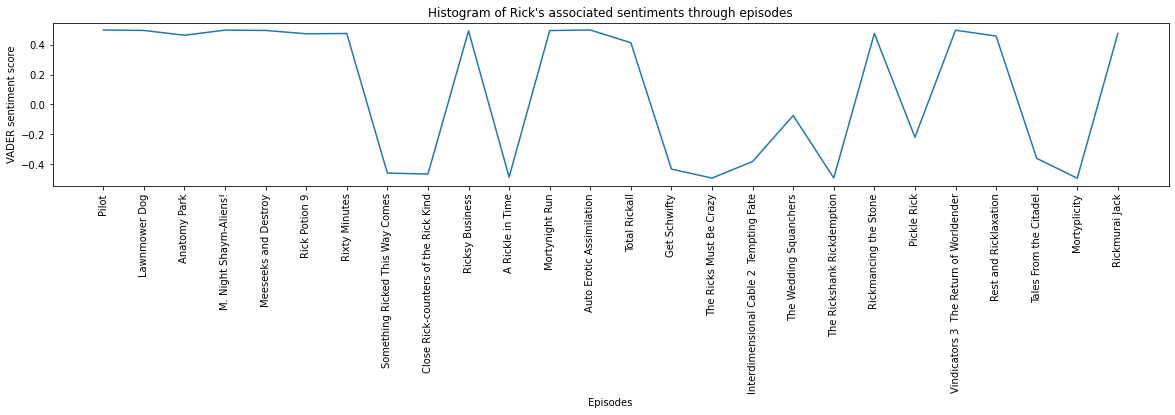

In [25]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_VADER_Rick['episode name'], df_VADER_Rick.VADER_score)
plt.xticks(rotation=90)
plt.title("Histogram of Rick's associated sentiments through episodes", )
plt.xlabel("Episodes")
plt.ylabel("VADER sentiment score")
plt.show()

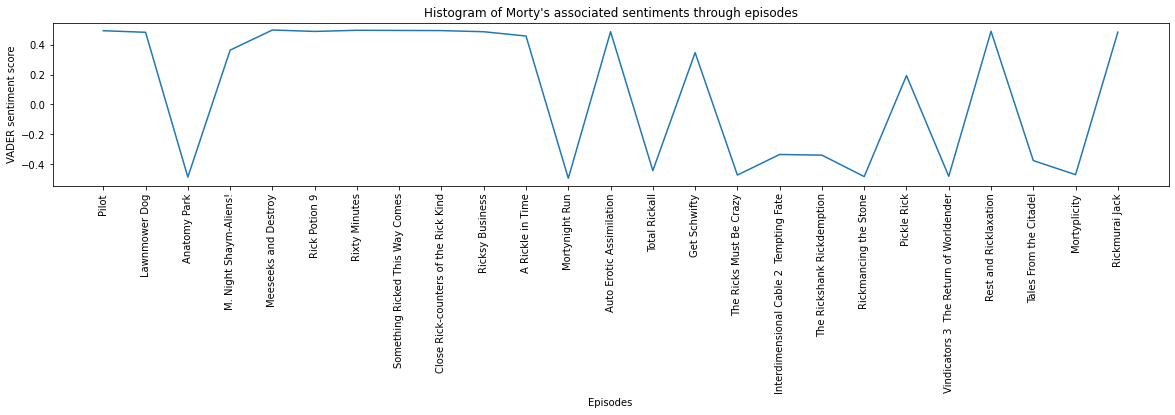

In [26]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_VADER_Morty['episode name'], df_VADER_Morty.VADER_score)
plt.xticks(rotation=90)
plt.title("Histogram of Morty's associated sentiments through episodes", )
plt.xlabel("Episodes")
plt.ylabel("VADER sentiment score")
plt.show()

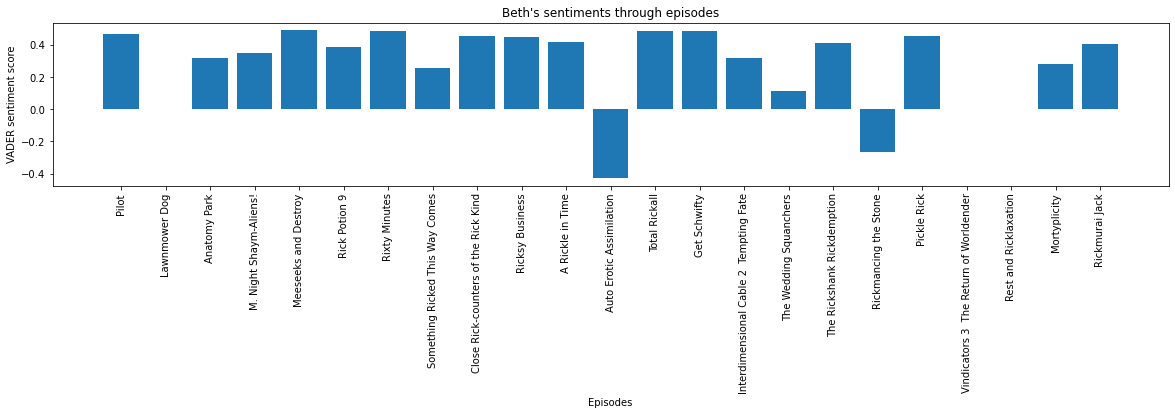

In [27]:
# plt.rcParams["figure.figsize"] = (20,3)
# plt.plot(df_VADER_Beth['episode name'], df_VADER_Beth.VADER_score, 'r')
# plt.plot(df_VADER_Jerry['episode name'], df_VADER_Jerry.VADER_score, 'b')
# plt.xticks(rotation=90)
# plt.title("Histogram of Beth's and Jerry's associated sentiments through episodes", )
# plt.xlabel("Episodes")
# plt.ylabel("VADER sentiment score")



# labels = df_VADER_Beth['episode name']
# #men_means = [20, 34, 30, 35, 27]
# #women_means = [25, 32, 34, 20, 25]


# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, df_VADER_Beth.VADER_score, label='Beth')
# rects2 = ax.bar(x + width/2, df_VADER_Jerry.VADER_score, label='Jerry')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('VADER Score')
# ax.set_title('Sentiment analysis through episodes for Beth and Jerry')
# ax.set_xticks(labels)
# ax.legend()
# plt.xticks(rotation=90)

# #ax.bar_label(rects1, padding=1)
# #ax.bar_label(rects2, padding=1)

# fig.tight_layout()

# plt.show()


plt.rcParams["figure.figsize"] = (20,3)
plt.bar(df_VADER_Beth['episode name'],df_VADER_Beth.VADER_score)
plt.xticks(rotation=90)
plt.title("Beth's sentiments through episodes", )
plt.xlabel("Episodes")
plt.ylabel("VADER sentiment score")
plt.show()

# from matplotlib.pyplot import figure


# font = {'family' : 'Times New Roman',
#         'weight' : 'bold',
#         'size'   : 18}

# plt.rc('font', **font)

# figure(num=None, figsize=(14, 7))

# t_1 = df_VADER_Rick.VADER_score
# t_2 = df_VADER_Morty.VADER_score
# #t_3 = [26794, 39706, 78924, 18066, 8666]
# #t_4 = [1491, 2032, 4358, 765, 469]


# Labels= df_VADER_Rick['episode name']
# y_pos=np.arange(len(Labels))
# plt.bar(y_pos + 0, t_1,width=0.2, color = 'navy' , label='test label-1')
# plt.bar(y_pos + 0.2,t_2, width=0.2,color = 'skyblue',label = 'test label-2')
# #plt.bar(y_pos + 0.4, t_3,width=0.2, color = 'darkcyan' , label='test label-3')
# #plt.bar(y_pos + 0.6, t_4,width=0.2, color = 'black' , label='test label-4')

# plt.xticks(y_pos, Labels)
# #plt.yscale('log')
# plt.legend(('Beth','Jerry'))   ##, 'test label-3', 'test label-4'))
# plt.ylabel('VADER Score')
# plt.xlabel('Episodes')
# plt.title("Sentiment analysis through episodes for Beth and Jerry")
# plt.show()
# # plt.savefig('figure_name.pdf', dpi=300)

In [28]:
# plt.rcParams["figure.figsize"] = (20,3)
# plt.plot(df_VADER_Jerry['episode name'], df_VADER_Jerry.VADER_score)
# plt.xticks(rotation=90)
# plt.title("Histogram of Jerry's associated sentiments through episodes", )
# plt.xlabel("Episodes")
# plt.ylabel("VADER sentiment score")
# plt.show()

Text(0, 0.5, 'VADER sentiment score')

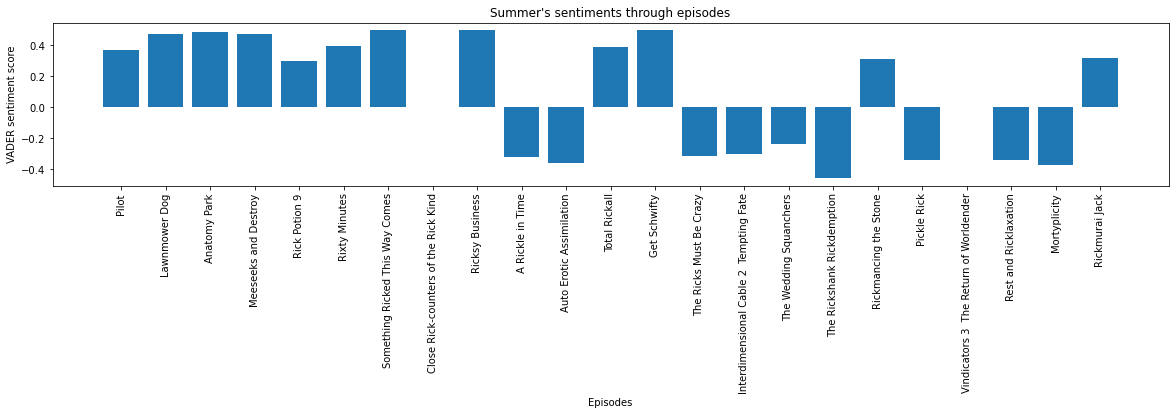

In [29]:
plt.rcParams["figure.figsize"] = (20,3)
plt.bar(df_VADER_Summer['episode name'], df_VADER_Summer.VADER_score)
#plt.plot(df_VADER_Summer['episode name'], df_VADER_Summer.VADER_score)
plt.xticks(rotation=90)
plt.title("Summer's sentiments through episodes", )
plt.xlabel("Episodes")
plt.ylabel("VADER sentiment score")

In [30]:
pd.read_csv('https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/RaM_imdb_episodes_ranking.csv')

,rank,Title,rate,nb_votes,imdb_link,Season_nb,Episode_nb
0,1,Tales From the Citadel,9.8,29698,https://www.imdb.com/title/tt5218332/,3,7
1,2,The Rickshank Rickdemption,9.6,19948,https://www.imdb.com/title/tt5218228/,3,1
2,3,Total Rickall,9.6,16633,https://www.imdb.com/title/tt4832262/,2,4
3,4,Rickmurai Jack,9.5,8127,https://www.imdb.com/title/tt15041334/,5,10
4,5,The Vat of Acid Episode,9.5,12058,https://www.imdb.com/title/tt10655692/,4,8
5,6,The Wedding Squanchers,9.4,13492,https://www.imdb.com/title/tt4832278/,2,10
6,7,Close Rick-counters of the Rick Kind,9.4,14232,https://www.imdb.com/title/tt3333846/,1,10
7,8,Pickle Rick,9.3,17516,https://www.imdb.com/title/tt5218268/,3,3
8,9,The Ricks Must Be Crazy,9.3,13424,https://www.imdb.com/title/tt4832268/,2,6
9,10,Star Mort Rickturn of the Jerri,9.2,8756,https://www.imdb.com/title/tt10655696/,4,10
